Comparison: Year 2017, Old: H201812 with biology H201905 New:202007C  
Note that H201812 started in November 2014 whereas 202007C started on Jan 1 2017

In [10]:
import cmocean.cm as cm
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import xarray as xr

from salishsea_tools import visualisations as vis
from salishsea_tools import viz_tools

%matplotlib inline

In [11]:
mesh = nc.Dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
bathy = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')
tmask = mesh['tmask']
deptht = mesh['gdept_1d'][0]

In [12]:
year = '2017'
olddir = 'averages/nowcast-green.201812/'
newdir = '202007/202007C/'

In [13]:
def surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, twoD=False, olddir=olddir, zoom=[0, 0, 0, 0], dl=0):
    fig, axs = plt.subplots(1, 3, figsize=(10, 5))

    dm = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/{olddir}/SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc')

    if twoD:
        mean_field = np.ma.array(dm[tracer][0], mask=1-tmask[0, 0])
    else:
        mean_field = np.ma.array(dm[tracer][0, dl], mask=1-tmask[0, dl])
    colours = axs[0].pcolormesh(mean_field, cmap=cmap, vmax=vmax, vmin=vmin)
    axs[0].set_title(olddir)
    fig.colorbar(colours, ax=axs[0])
    
    ds = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/{newdir}/SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc')
    
    if twoD:
        field = np.ma.array(ds[tracer][0], mask=1-tmask[0,0])
    else:
        field = np.ma.array(ds[tracer][0, dl], mask=1-tmask[0, dl])
    colours = axs[1].pcolormesh(field, cmap=cmap, vmax=vmax, vmin=vmin)
    axs[1].set_title(newdir)
    fig.colorbar(colours, ax=axs[1])
    
    colours = axs[2].pcolormesh(field-mean_field, cmap=cdiff, vmax=dvmax, vmin=-dvmax)
    axs[2].set_title("New - Old")
    fig.colorbar(colours, ax=axs[2])
    ds.close()
    dm.close()


    for ax in axs:
        viz_tools.set_aspect(ax)
        if sum(zoom) > 0:
            ax.set_ylim(zoom[0], zoom[1])
            ax.set_xlim(zoom[2], zoom[3])

    return fig

In [14]:
def profiles(tracer, file, olddir=olddir):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    dm = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/{olddir}/SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc')
    mean_field = np.ma.array(dm[tracer][0], mask=1-tmask[0])
    axs[0].plot(mean_field.mean(axis=1).mean(axis=1), deptht, linewidth=2, label='Old')
    axs[1].plot(np.zeros_like(deptht), deptht, linewidth=2, label='Old')
    
    ds = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/{newdir}/SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc')

    field = np.ma.array(ds[tracer][0], mask=1-tmask[0])
    axs[0].plot(field.mean(axis=1).mean(axis=1), deptht, label='New')
    
    axs[1].plot((field-mean_field).mean(axis=1).mean(axis=1), deptht, label='New')
    print (mean_field.mean(axis=1).mean(axis=1).max(), field.mean(axis=1).mean(axis=1).max())
    ds.close()
    dm.close()

    
    axs[0].invert_yaxis()
    axs[0].legend(loc='best')
    
    axs[1].invert_yaxis()
    axs[1].legend(loc='best')
    
    return fig

In [15]:
def thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, olddir=olddir):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    dm = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/{olddir}/SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc')
    mean_field = np.array(dm[tracer][0])
    colours = vis.contour_thalweg(axs[0], mean_field, bathy, mesh,np.arange(vmin, 1.1*vmax+0.1*vmin, (vmax-vmin)/10.), cmap=cmap)
    axs[0].set_title(olddir)

    ds = xr.open_dataset(
        f'/data/sallen/results/MEOPAR/{newdir}/SalishSea_1m_{year}{month}_{year}{month}_{file}_T.nc')
    field = np.array(ds[tracer][0])
    colours = vis.contour_thalweg(axs[1], field, bathy, mesh,np.arange(vmin, 1.1*vmax+0.1*vmin, (vmax-vmin)/10.), cmap=cmap)

    axs[1].set_title(newdir)
    colours = vis.contour_thalweg(axs[2], field-mean_field, bathy, mesh, np.arange(-dvmax, 1.2*dvmax, dvmax/5), 
                                      cmap=cdiff)
 
    axs[2].set_title('New - Old')
    ds.close()
    dm.close()

    fig.tight_layout()
    return fig

## January: Temperature

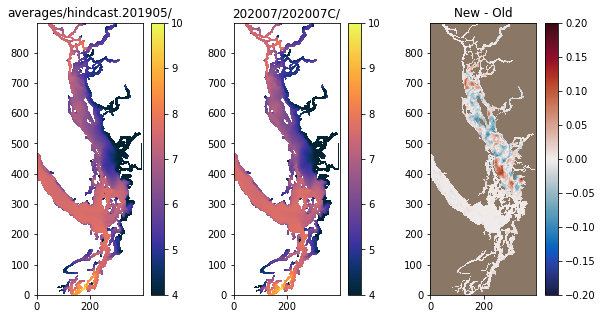

In [75]:
tracer = 'votemper'
file = 'grid'
month = '01'
cmap = cm.thermal
cdiff = cm.balance
vmax = 10
vmin = 4
dvmax = 0.2
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/hindcast.201905/')

9.603270732642011 9.603242963834282


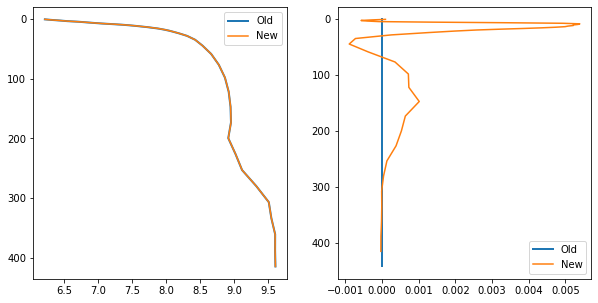

In [76]:
fig = profiles(tracer, file, olddir='averages/hindcast.201905/')

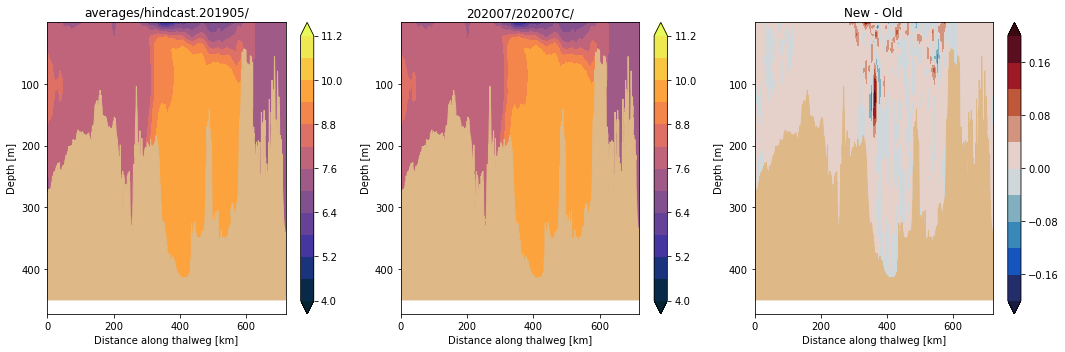

In [77]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/hindcast.201905/')

## January: Nitrate

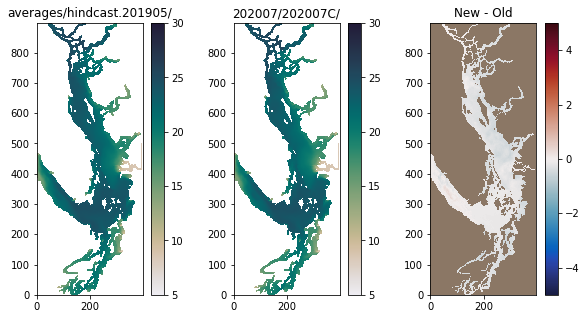

In [78]:
tracer = 'nitrate'
file = 'ptrc'
month = '01'
cmap = cm.rain
cdiff = cm.balance
vmax = 30
vmin = 5
dvmax = 5
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/hindcast.201905/')

27.888091969636907 27.888128045317032


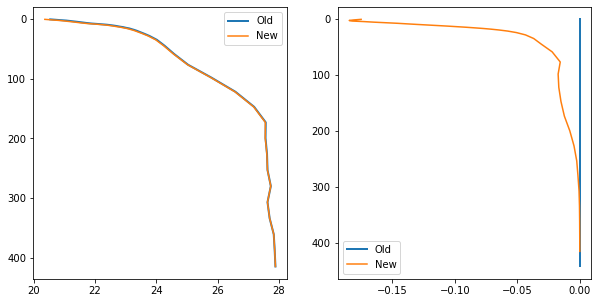

In [79]:
fig = profiles(tracer, file, olddir='averages/hindcast.201905/')

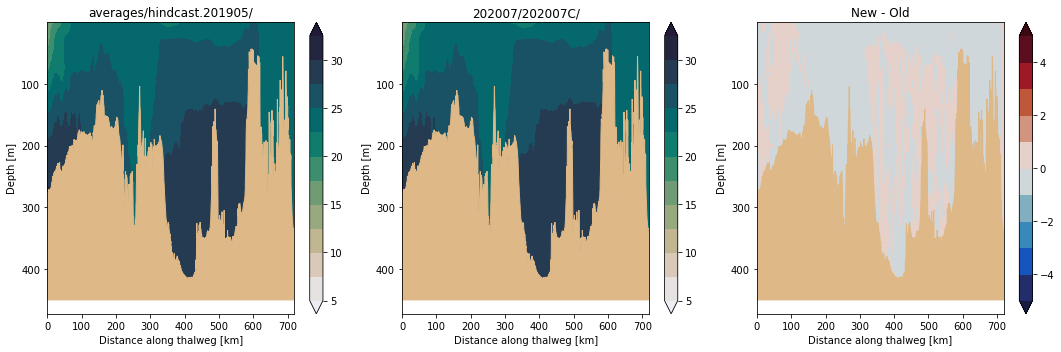

In [80]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/hindcast.201905/')

## February: Nitrate

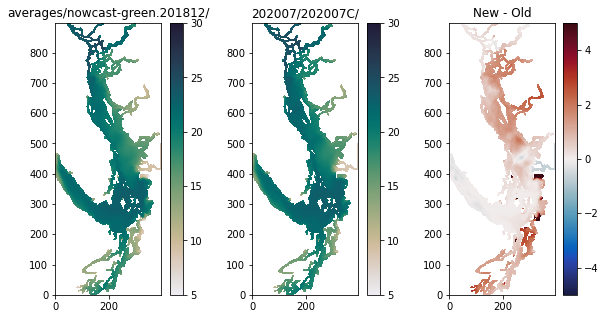

In [22]:
tracer = 'nitrate'
file = 'ptrc'
month = '02'
cmap = cm.rain
cdiff = cm.balance
vmax = 30
vmin = 5
dvmax = 5
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

29.535854924368287 27.968503668092808


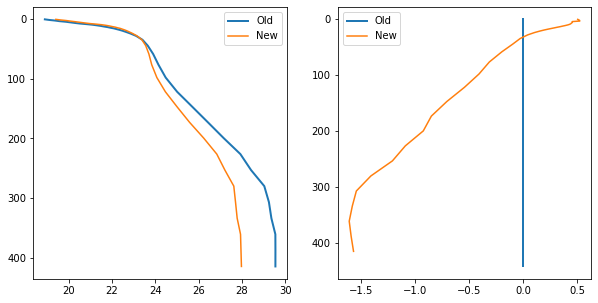

In [23]:
fig = profiles(tracer, file)

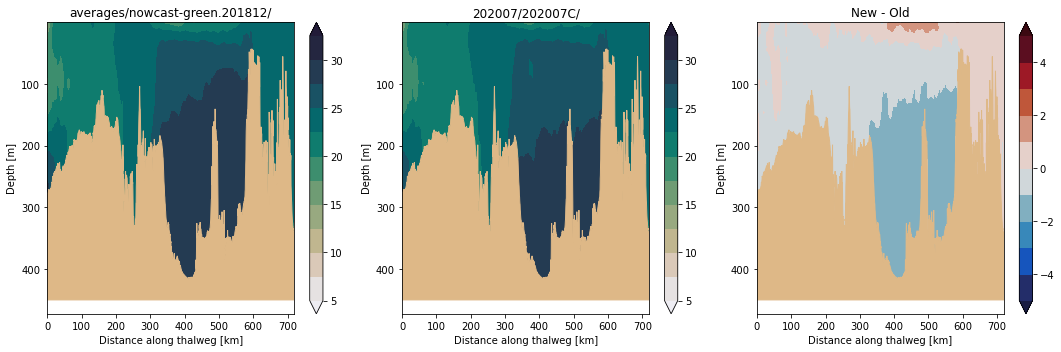

In [24]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## February: Flagellates

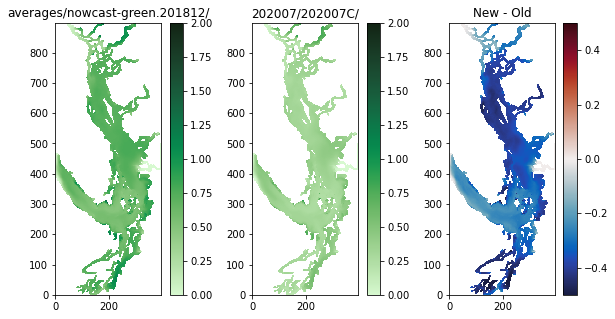

In [25]:
tracer = 'flagellates'
file = 'ptrc'
month = '02'
cmap = cm.algae
cdiff = cm.balance
vmax = 2
vmin = 0
dvmax = 0.5
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

0.6154404859888913 0.3323746578976569


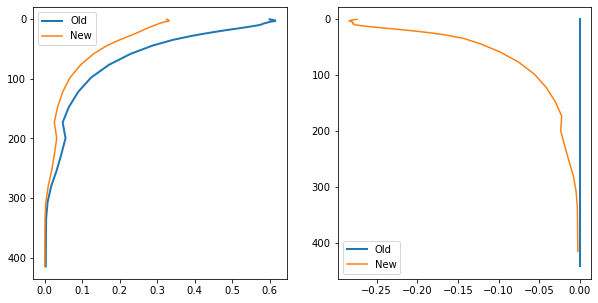

In [26]:
fig = profiles(tracer, file)

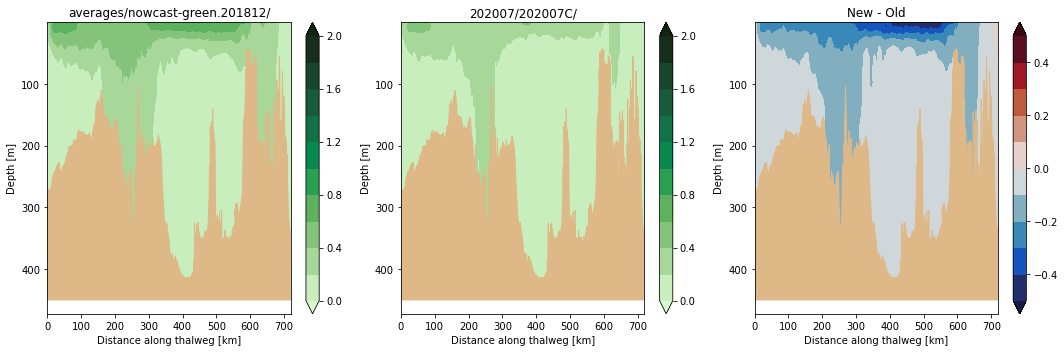

In [27]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## February: Diatoms

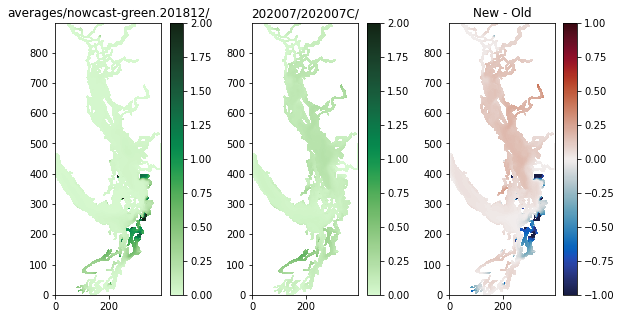

In [28]:
tracer = 'diatoms'
file = 'ptrc'
month = '02'
cmap = cm.algae
cdiff = cm.balance
vmax = 2
vmin = 0
dvmax = 1
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

0.07728472256860851 0.11224946502429098


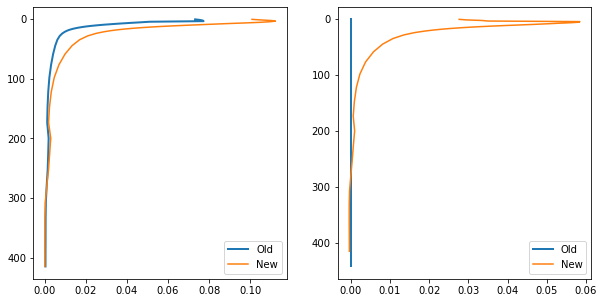

In [29]:
fig = profiles(tracer, file)

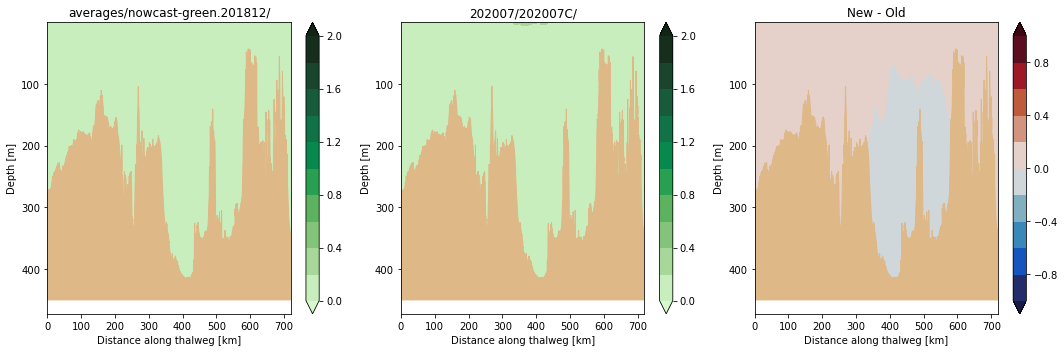

In [30]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## March: Diatoms

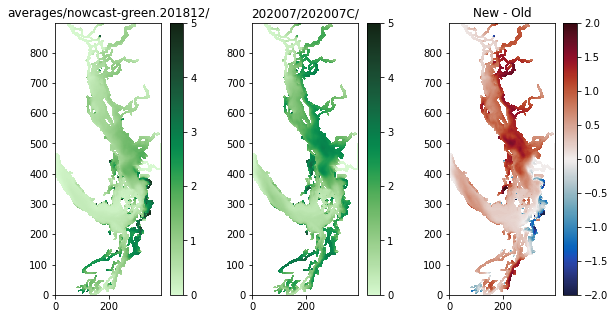

In [31]:
tracer = 'diatoms'
file = 'ptrc'
month = '03'
cmap = cm.algae
cdiff = cm.balance
vmax = 5
vmin = 0
dvmax = 2
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

0.7884837814116671 1.2651726973265995


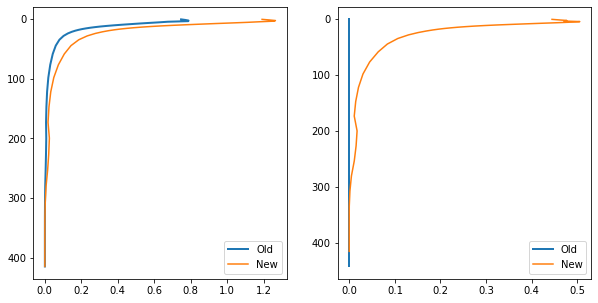

In [32]:
fig = profiles(tracer, file)

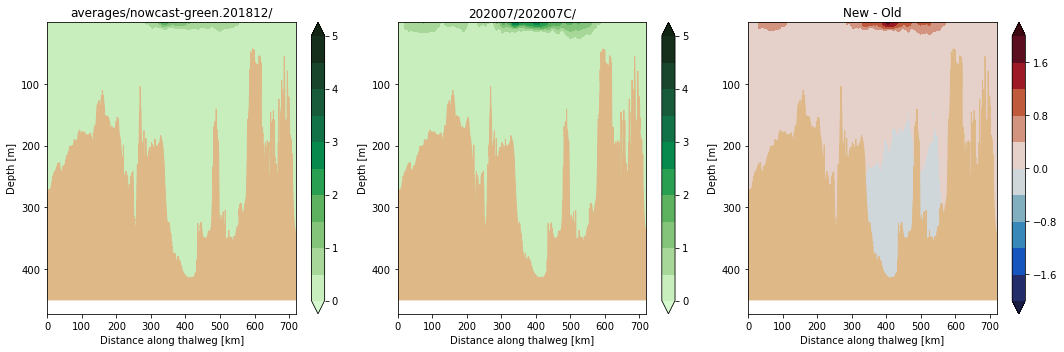

In [33]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## March: Flagellates

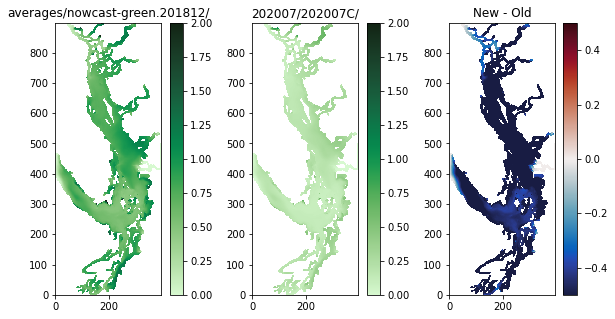

In [34]:
tracer = 'flagellates'
file = 'ptrc'
month = '03'
cmap = cm.algae
cdiff = cm.balance
vmax = 2
vmin = 0
dvmax = 0.5
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

0.6871529374289383 0.1890267796174959


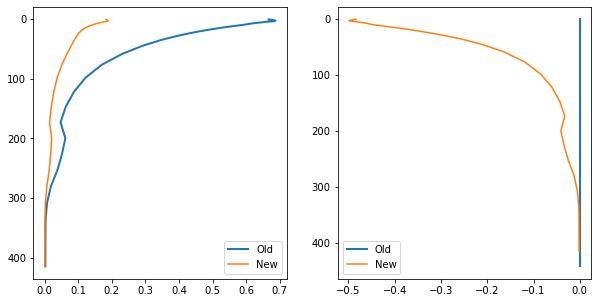

In [35]:
fig = profiles(tracer, file)

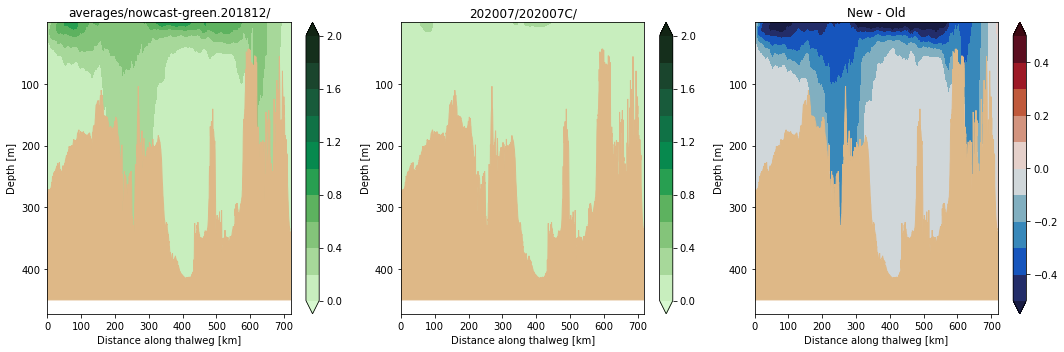

In [36]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## April: Microzooplankton

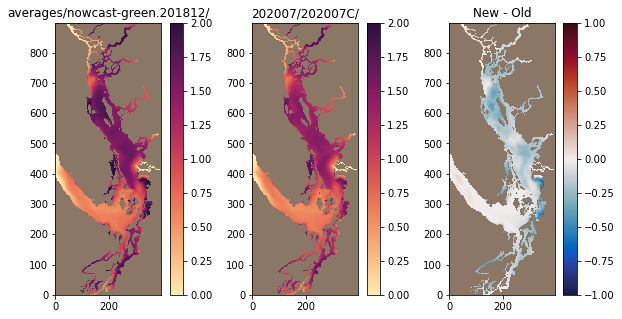

In [37]:
tracer = 'microzooplankton'
file = 'ptrc'
month = '04'
cmap = cm.matter
cmap.set_bad('#8b7765')
cb1 = "Microzooplankton (uM N)"
cdiff = cm.balance
cdiff.set_bad('#8b7765')
cb2 = 'Microzooplankton (uM N)'
vmax = 2
vmin = 0
dvmax = 1
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

0.9955176529279728 0.8993623776780615


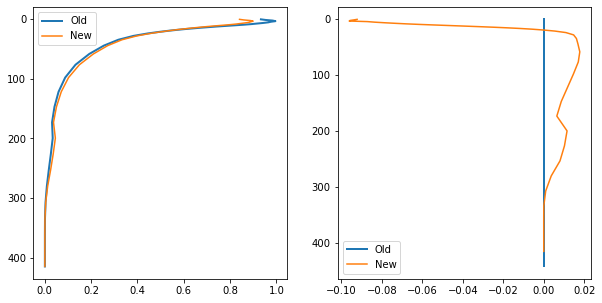

In [38]:
fig = profiles(tracer, file)

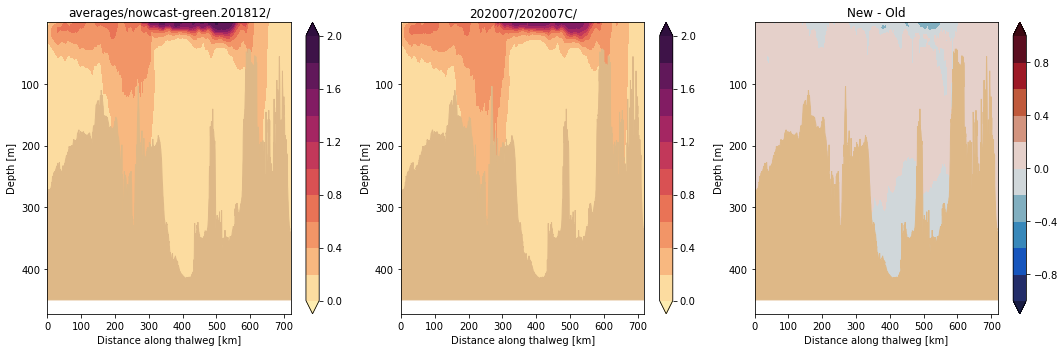

In [39]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## May: Salinity

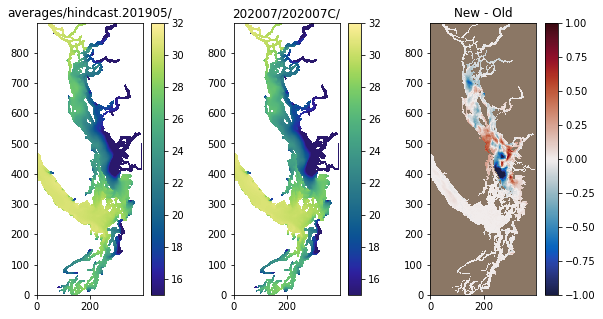

In [81]:
tracer = 'vosaline'
file = 'grid'
month = '05'
cmap = cm.haline
cdiff = cm.balance
vmax = 32
vmin = 15
dvmax = 1
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/hindcast.201905/')

31.791883504480847 31.791329694015126


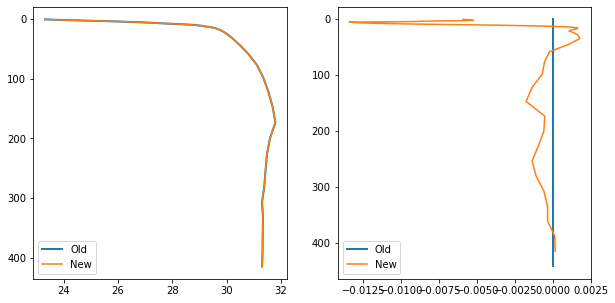

In [82]:
fig = profiles(tracer, file, olddir='averages/hindcast.201905/')

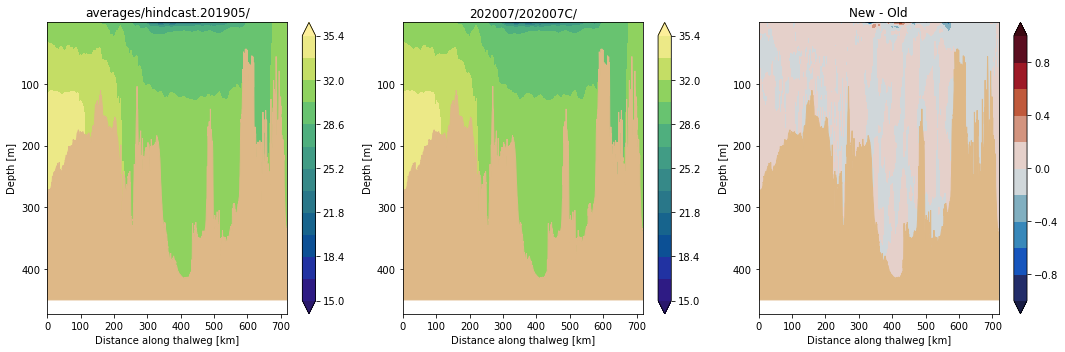

In [83]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/hindcast.201905/')

## May Diatoms

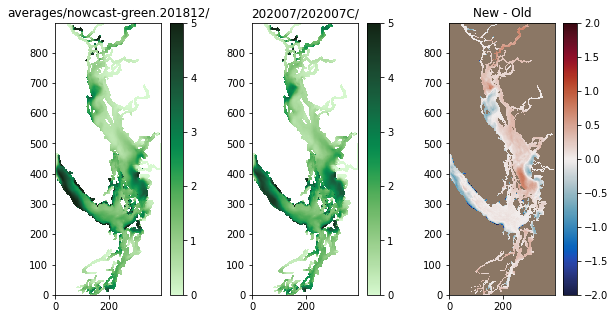

In [43]:
tracer = 'diatoms'
file = 'ptrc'
month = '05'
cmap = cm.algae
cdiff = cm.balance
vmax = 5
vmin = 0
dvmax = 2
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

1.946907442494656 1.9527487086672828


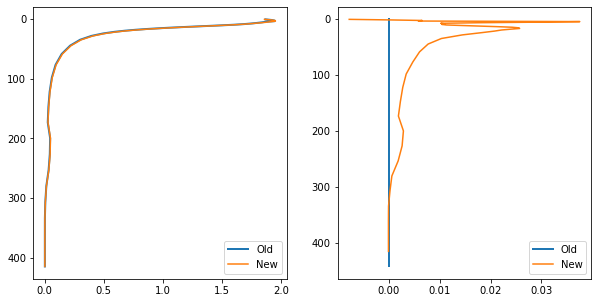

In [44]:
fig = profiles(tracer, file)

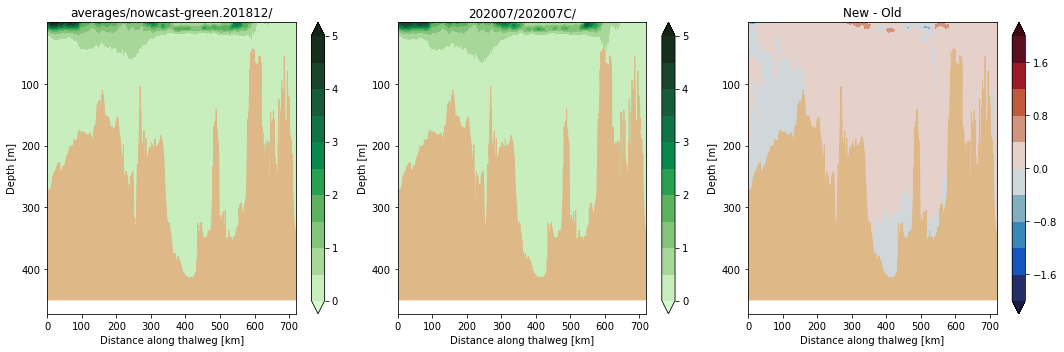

In [45]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## June: Flagellates

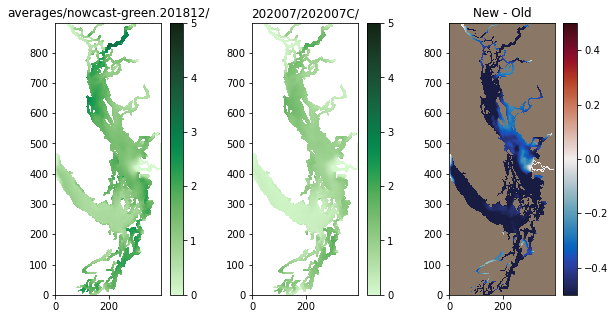

In [49]:
tracer = 'flagellates'
file = 'ptrc'
month = '06'
cmap = cm.algae
cdiff = cm.balance
vmax = 5
vmin = 0
dvmax = 0.5
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

1.2065545994281917 0.6531689177306615


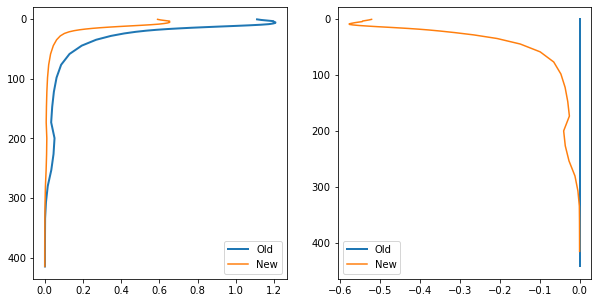

In [50]:
fig = profiles(tracer, file)

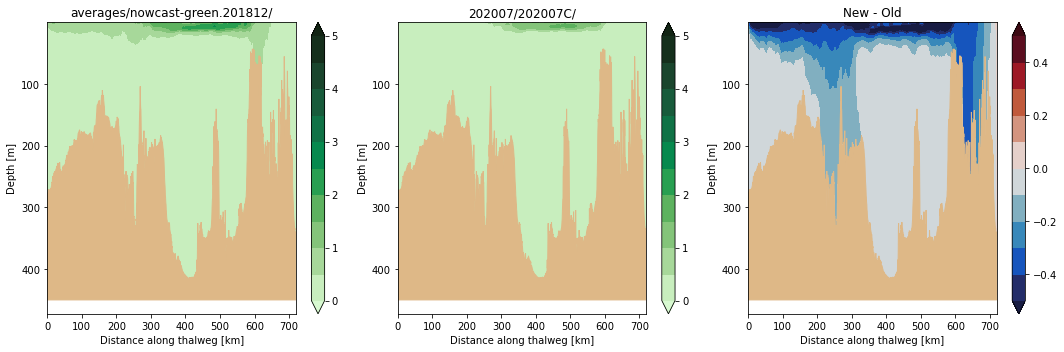

In [51]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## June : NH4

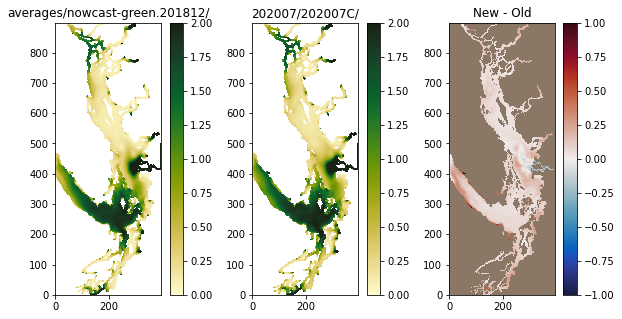

In [52]:
tracer = 'ammonium'
file = 'ptrc'
month = '06'
cmap = cm.speed
cdiff = cm.balance
vmax = 2
vmin = 0
dvmax = 1
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

2.0585326932588086 2.1054753508405435


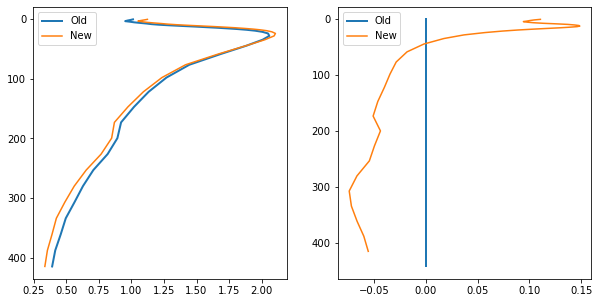

In [53]:
fig = profiles(tracer, file)

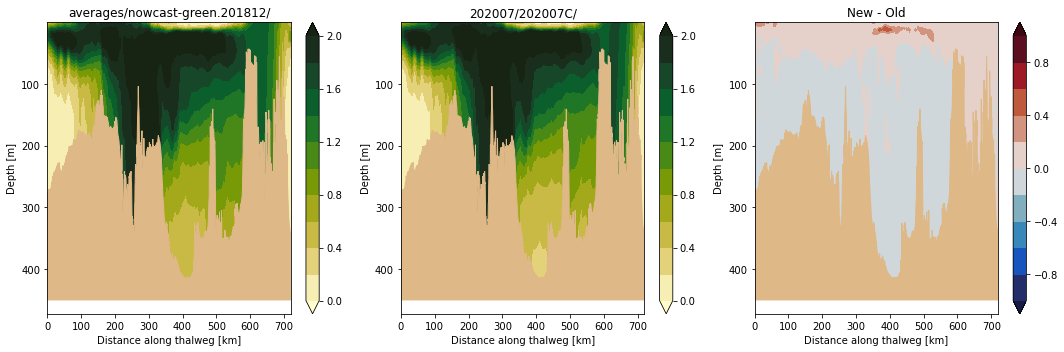

In [54]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## June: SSH

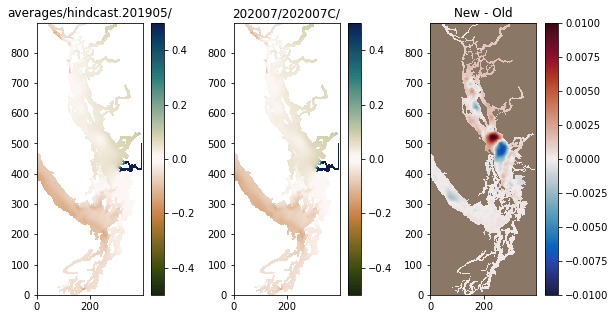

In [55]:
tracer = 'sossheig'
file = 'grid'
month = '06'
cmap = cm.tarn
cdiff = cm.balance
vmax = 0.5
vmin = -0.5
dvmax = 0.01
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, twoD=True, olddir='averages/hindcast.201905/')

## June: PON

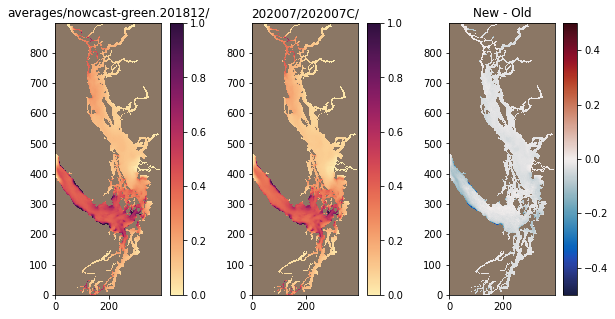

In [56]:
tracer = 'particulate_organic_nitrogen'
file = 'ptrc'
month = '06'
cmap = cm.matter
cdiff = cm.balance
vmax = 1
vmin = 0
dvmax = 0.5
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

0.7879367770935342 0.7575961008353057


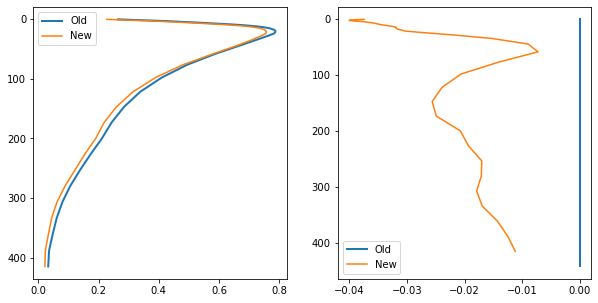

In [57]:
fig = profiles(tracer, file)

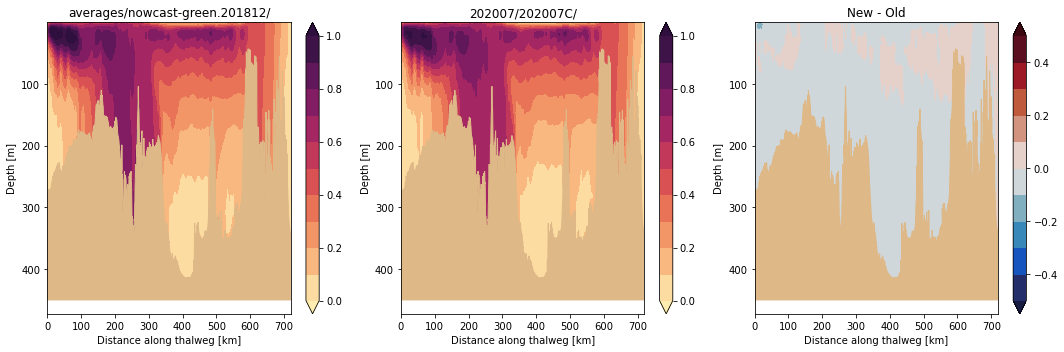

In [58]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## June: dissolved Silicon

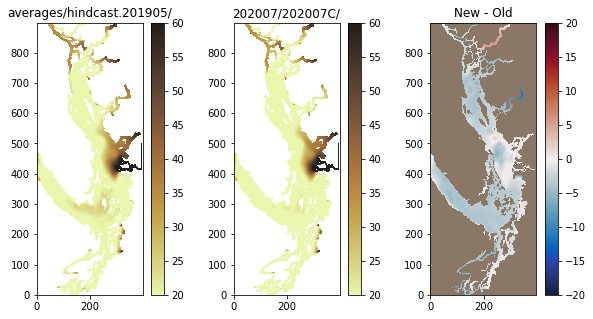

In [84]:
tracer = 'silicon'
file = 'ptrc'
month = '06'
cmap = cm.turbid
cdiff = cm.balance
vmax = 60
vmin = 20
dvmax = 20
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/hindcast.201905/')

72.7474943662029 75.22959672032577


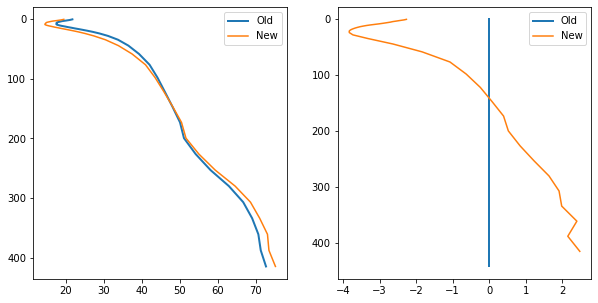

In [85]:
fig = profiles(tracer, file, olddir='averages/hindcast.201905/')

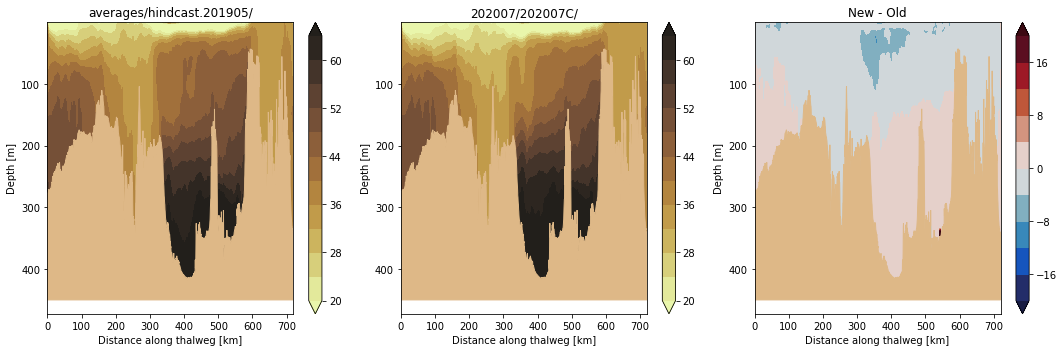

In [86]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/hindcast.201905/')

## June: DIC

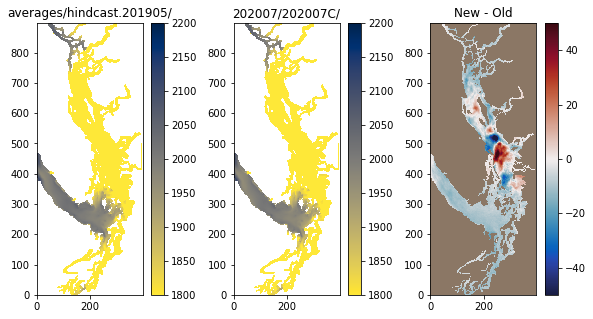

In [87]:
tracer = 'dissolved_inorganic_carbon'
file = 'carp'
month = '06'
cmap = 'cividis_r'
cdiff = cm.balance
vmax = 2200
vmin = 1800
dvmax = 50
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/hindcast.201905/')

2174.830351284284 2174.871768036604


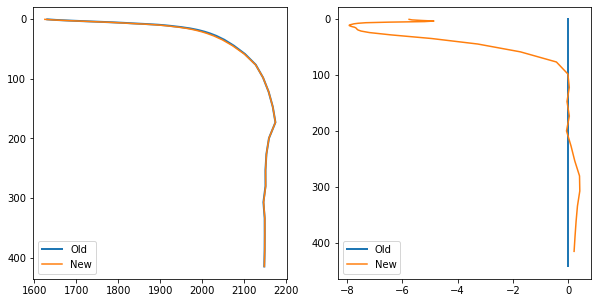

In [88]:
fig = profiles(tracer, file, olddir='averages/hindcast.201905/')

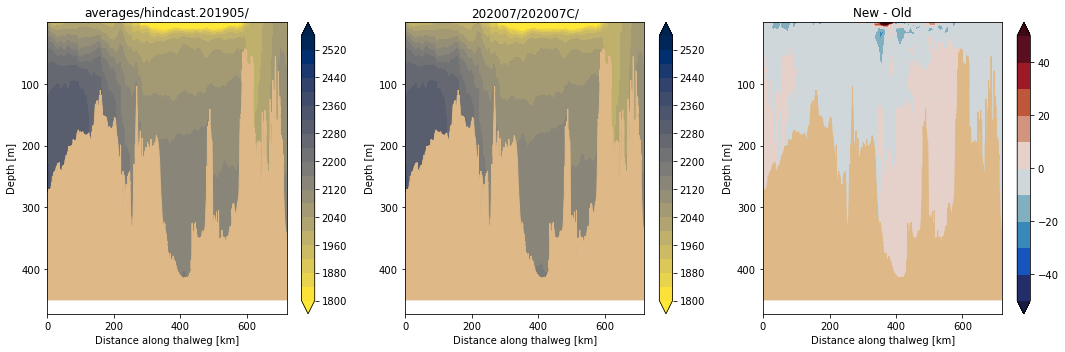

In [89]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/hindcast.201905/')

## June Nitrate

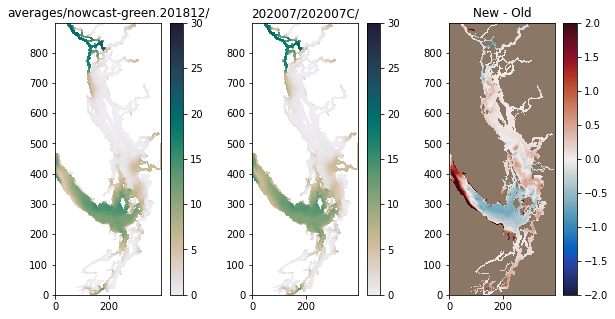

In [65]:
tracer = 'nitrate'
file = 'ptrc'
month = '06'
cmap = cm.rain
cdiff = cm.balance
vmax = 30
vmin = 0
dvmax = 2
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax)

29.892569598657712 28.270135148481224


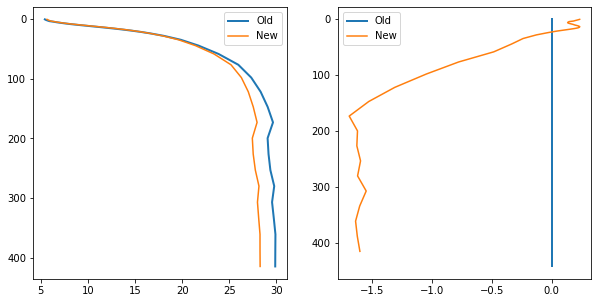

In [66]:
fig = profiles(tracer, file)

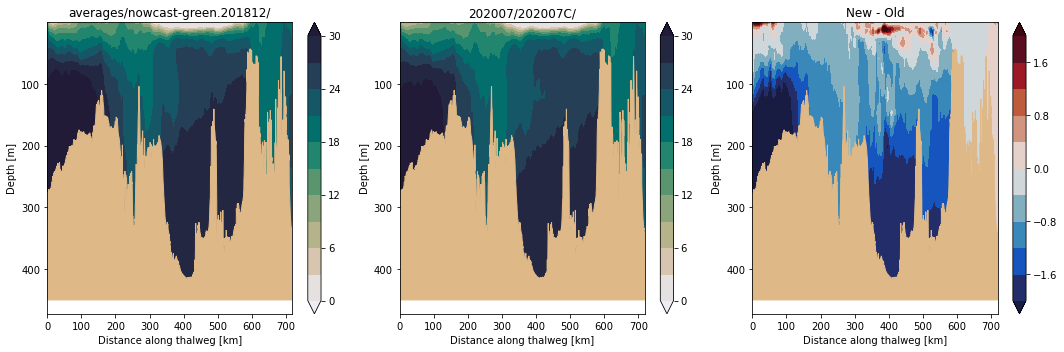

In [67]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax)

## June Nitrate versus H201905

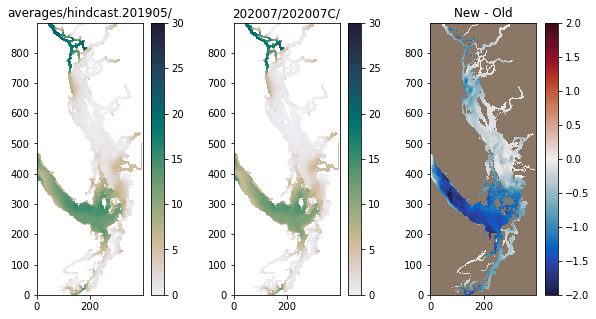

In [90]:
tracer = 'nitrate'
file = 'ptrc'
month = '06'
cmap = cm.rain
cdiff = cm.balance
vmax = 30
vmin = 0
dvmax = 2
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/hindcast.201905/')

28.24514660744643 28.270135148481224


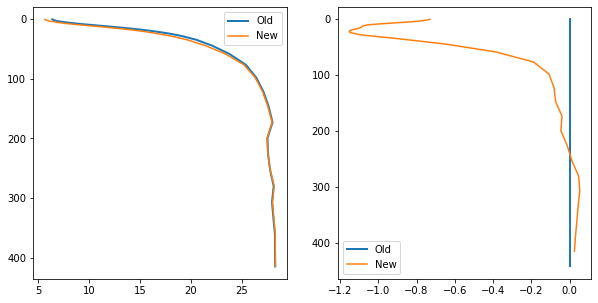

In [91]:
fig = profiles(tracer, file, olddir='averages/hindcast.201905/')

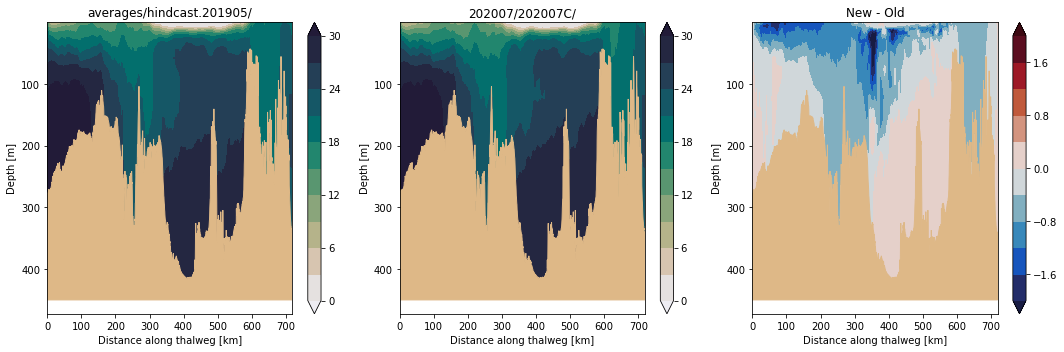

In [92]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/hindcast.201905/')

## June Alkalinity

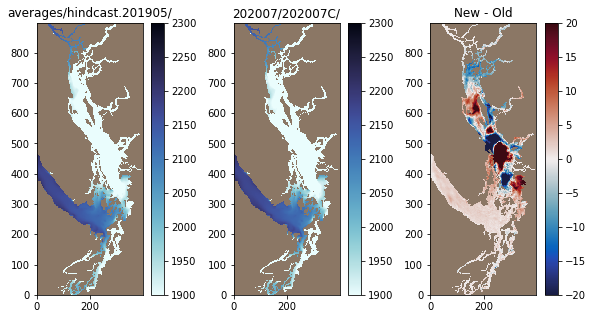

In [71]:
tracer = 'total_alkalinity'
file = 'carp'
month = '06'
cmap = cm.ice_r
cmap.set_bad('#8b7765')
cdiff = cm.balance
vmax = 2300
vmin = 1900
dvmax = 20
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/hindcast.201905/')

2213.2559001372133 2213.1985967626215


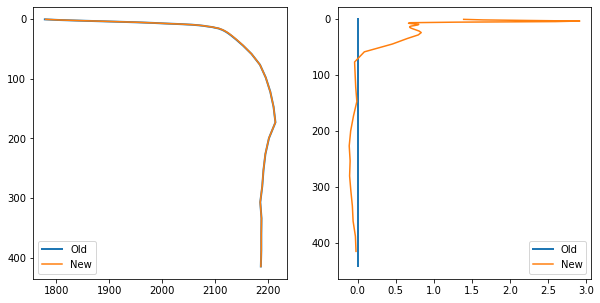

In [72]:
fig = profiles(tracer, file, olddir='averages/hindcast.201905/')

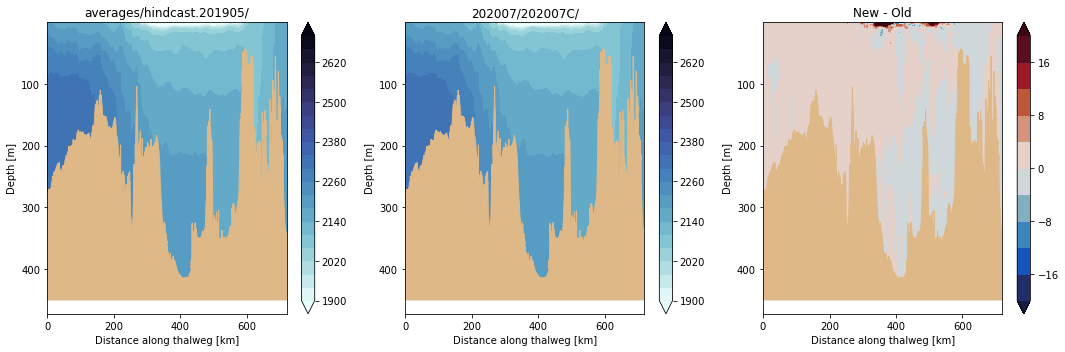

In [73]:
fig = thalweg_plots(tracer, file, cmap, cdiff, vmax, vmin, dvmax, olddir='averages/hindcast.201905/')

## December Fraser Tracer

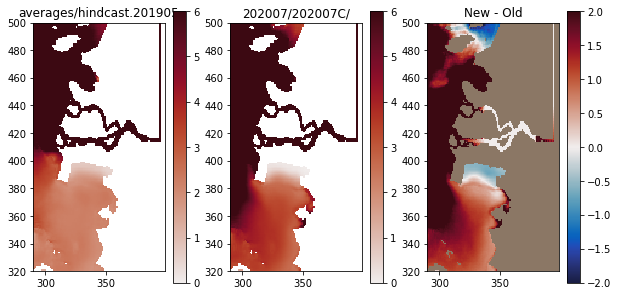

In [74]:
tracer = 'Fraser_tracer'
file = 'carp'
month = '06'
cmap = cm.amp
cdiff = cm.balance
vmax = 6
vmin = 0
dvmax = 2
fig = surface_plots(tracer, file, month, cmap, cdiff, vmax, vmin, dvmax, dl=3,
                    zoom=[320, 500, 290, 398], olddir='averages/hindcast.201905')